In [4]:
import numpy as np

from matplotlib import pyplot as plt, colors
from tqdm import tqdm

In [75]:
def random_step_infinite(num_sims: int, p_x: float = 0.5, p_y: float = 0.5, num_steps: int = 100):
    res_x, res_y = np.array(0), np.array(0)
    num_sims_step = 100_000

    sims = int(num_sims / num_sims_step)
    for _ in tqdm(range(sims)):
        move_x = np.random.rand(num_steps, num_sims_step)
        move_x_int = (move_x > p_x).astype(int) - (move_x <= p_x).astype(int)
        move_y = np.random.rand(num_steps, num_sims_step)
        move_y_int = (move_y > p_y).astype(int) - (move_y <= p_y).astype(int)
        res_x_ = np.sum(move_x_int, axis=0)
        res_y_ = np.sum(move_y_int, axis=0)

        try:
            res_x = np.append(res_x, res_x_, 0)
            res_y = np.append(res_y, res_y_, 0)
        except:
            res_x, res_y = res_x_, res_y_

    return res_x, res_y

100%|██████████| 100/100 [00:19<00:00,  5.19it/s]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


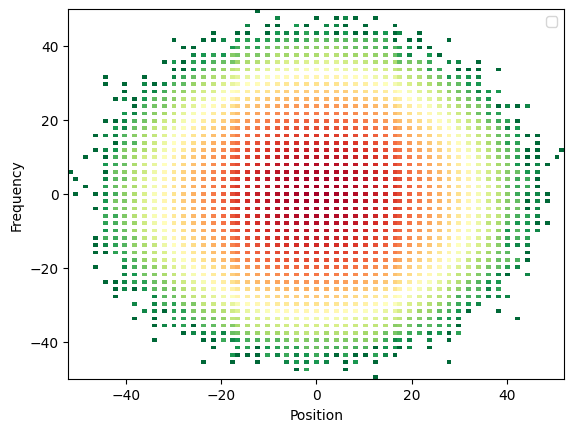

In [76]:
res_x, res_y = random_step_infinite(100_000_00)

plt.hist2d(res_x, res_y, bins=(101, 101), cmap="RdYlGn_r", norm=colors.LogNorm())

# Adding labels and title
plt.xlabel("Position")
plt.ylabel("Frequency")

plt.legend()

# Display the plot
plt.show()

In [70]:
def random_step_finite(
    num_sims: int,
    p_x: float = 0.5,
    p_y: float = 0.5,
    x_max: int = 10,
    x_min: int = -10,
    y_max: int = 10,
    y_min: int = -10,
    num_steps: int = 100,
):
    res_x, res_y = np.array(0), np.array(0)
    num_sims_step = 100_000

    sims = int(num_sims / num_sims_step)
    for _ in tqdm(range(sims)):
        move_x = np.random.rand(num_steps, num_sims_step)
        move_x_int = (move_x > p_x).astype(int) - (move_x <= p_x).astype(int)
        move_y = np.random.rand(num_steps, num_sims_step)
        move_y_int = (move_y > p_y).astype(int) - (move_y <= p_y).astype(int)
        res_x_, res_y_ = np.zeros(num_sims_step), np.zeros(num_sims_step)
        for i in range(move_x_int.shape[0]):
            res_x_ += move_x_int[i]
            res_y_ += move_y_int[i]

            res_x_ -= (res_x_ > x_max).astype(int) - (res_x_ < x_min).astype(int)
            res_y_ -= (res_y_ > y_max).astype(int) - (res_y_ < y_min).astype(int)

        try:
            res_x = np.append(res_x, res_x_, 0)
            res_y = np.append(res_y, res_y_, 0)
        except:
            res_x, res_y = res_x_, res_y_

    return res_x, res_y

In [71]:
res_x_finite, res_y_finite = random_step_finite(100_000_00)

100%|██████████| 100/100 [00:24<00:00,  4.11it/s]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


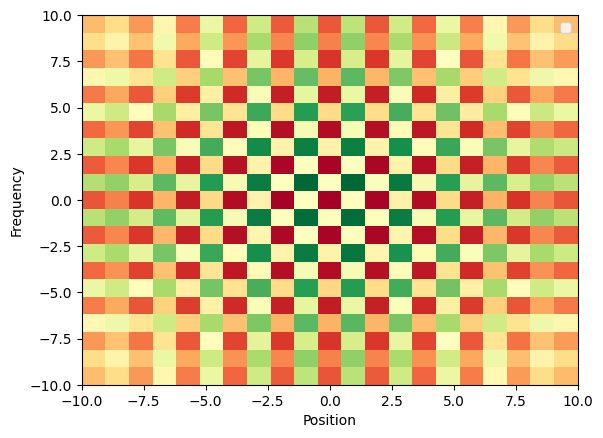

In [74]:
plt.hist2d(
    res_x_finite, res_y_finite, bins=(21, 21), cmap="RdYlGn_r", norm=colors.LogNorm()
)

# Adding labels and title
plt.xlabel("Position")
plt.ylabel("Frequency")

plt.legend()

# Display the plot
plt.show()